In [1]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


The XML data format look like below:
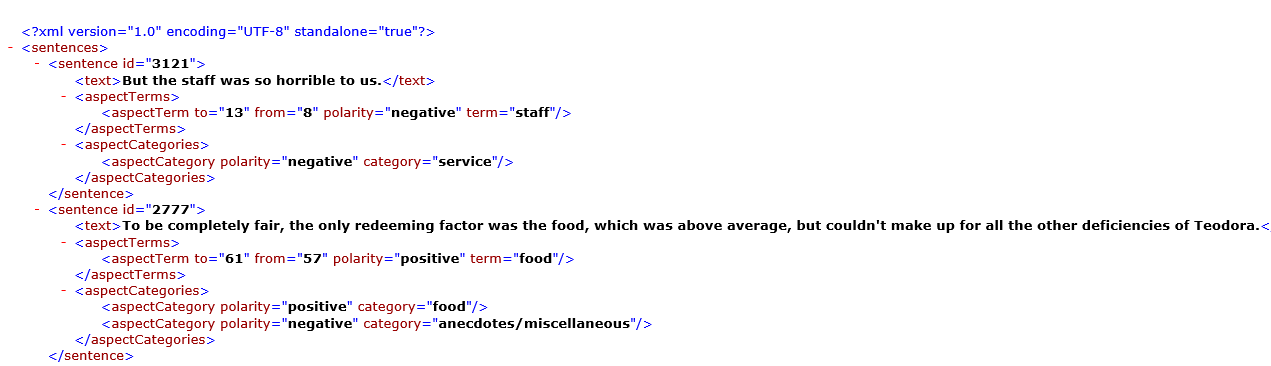

In [11]:
import xml.etree.ElementTree as ET
from string import punctuation

import xml.etree.ElementTree as ET
from string import punctuation

tree = ET.parse('/content/drive/MyDrive/Restaurants_Train_v2.xml')

root = tree.getroot()

sentences = []
for sentence in root.iter("sentence"):
        text = sentence.find("text")
        aspectTerms = sentence.findall("aspectTerms")
        if len(aspectTerms) > 0:
            for aspectTerms in sentence.iter("aspectTerms"):
                aspects = []
                for aspectTerm in aspectTerms.iter("aspectTerm"):
                    aspects.append(aspectTerm.attrib)
                sentences.append({"text":text.text, "aspects":aspects})
        else:
            sentences.append({"text":text.text, "aspects": None})

out = open("/content/drive/MyDrive/Restaurants_Train_v2.iob","w", encoding="utf-8")

#print(len(sentences))

pad = 0
global_aspect_count = 0
for sentence in sentences:
    aspects = sentence["aspects"]
    #print(aspects)
    text = sentence["text"]
    #print(text)
    if aspects is None:
        pad+=1
        text = text.strip()
        words = text.split(" ")
        for word in words:
            if word.strip() is not "":
                out.write(word+"\t"+"O"+"\n")
        out.write("\n")
    else:
        pad+=1
        dict = {}
        for aspect in aspects:
            term = aspect["term"]
            from_ = int(aspect["from"])
            to_ = int(aspect["to"])
            if term != "NULL" and from_ not in dict.keys():
                dict[from_] = [term,from_,to_]
            elif from_ in dict.keys():
                print(text)
                print(term == dict[from_][0])


        keys = sorted(dict)

        #print(dict)
        if len(keys) > 0:
            dump = ""
            last_end = 0
            counter = 0

            for key in keys:
                    global_aspect_count += 1
                    vals = dict[key]

                    term = vals[0]
                    from_ = vals[1]
                    to_ = vals[2]

                    aspect_ = text[from_:to_]
                    temp = text[last_end:from_]
                    last_end = to_

                    if aspect_ == term:

                        storage = ""
                        aspect = term.split(" ")
                        i = 0
                        for asp in aspect:
                            if i == 0:
                                storage = storage + asp + "\t" + "B-A" + "\n"
                                i+=1
                            else:
                                storage = storage + asp + "\t" + "I-A" + "\n"
                                i+=1
                        temp+=storage
                        dump+=temp
                        if counter == len(keys) -1:
                            dump+=text[to_:]
                        counter+=1
                    else:
                        print(aspect_)
                        print(term)
                        print("NO MATCH")
                        counter+=1

            if dump!= "":
                dump = dump.replace(" ","\t"+"O"+"\n")
                dump+= "\t"+"O"
                out.write(dump+"\n\n")
        else:
            #print("HERE")
            text = text.strip()
            words = text.split(" ")
            for word in words:
                if word.strip() is not "":
                    out.write(word + "\t" + "O" + "\n")
            out.write("\n")

#print(pad)
print(global_aspect_count)
out.close()

f = open("/content/drive/MyDrive/Restaurants_Train_v2.iob","r", encoding="utf-8")

out = open("/content/drive/MyDrive/Restaurants_Train_v2_mod.iob","w", encoding="utf-8")

for line in f:
    if line.strip()!="":
        #line = line.replace("..."," ")
        line1 = line.split("\t")
        line2 = ''.join(c for c in line1[0] if c not in punctuation)
        if line2.strip() == "":
         continue
        else:
            out.write(line2+"\t"+line1[1])
    else:
        out.write("\n")
out.close()

3693
